<a href="https://colab.research.google.com/github/jgkorman/Statistical-Analysis-In-Python/blob/main/Random_Slopes_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Random Slopes in Python**

In [ ]:
# load in necessary libraries for data analaysis
import pandas as pd
import numpy as np

In [ ]:
fname = "/content/drive/MyDrive/Delaware/Summer 2023/ICPSR/MLE 2/Lecture 3: Random Slopes/mlbook2_r.dta"
data = pd.read_stata(fname)

data

,schoolnr,pupilnr_new,langpost,ses,iq_verb,sex,minority,denomina,sch_ses,sch_iqv,sch_min
0,1,3,46.00,-4.73,3.13,0,0,1.000,-14.035,-1.4039,0.63
1,1,4,45.00,-17.73,2.63,0,1,1.000,-14.035,-1.4039,0.63
2,1,5,33.00,-12.73,-2.37,0,0,1.000,-14.035,-1.4039,0.63
3,1,6,46.00,-4.73,-0.87,0,0,1.000,-14.035,-1.4039,0.63
4,1,7,20.00,-17.73,-3.87,0,0,1.000,-14.035,-1.4039,0.63
...,...,...,...,...,...,...,...,...,...,...,...
3753,4210,43,-8.73,0.13,1.00,0,1,-13.246,-1.052,0.1110,NaN
3754,4211,28,-16.73,-1.37,1.00,0,1,-13.246,-1.052,0.1110,NaN
3755,4212,38,-5.73,0.63,0.00,0,1,-13.246,-1.052,0.1110,NaN
3756,4213,50,2.27,1.13,1.00,0,1,-13.246,-1.052,0.1110,NaN


##**Getting group means from select variables**

In [ ]:
# get group means for "iq_verb" variable and "SES" variable

# Assuming you have your dataset loaded into a pandas DataFrame called 'data'
data['gmean_IQverb'] = data.groupby('schoolnr')['iq_verb'].transform('mean')
data['gmean_SES'] = data.groupby('schoolnr')['ses'].transform('mean')
data['IQxMeanIQ'] = data['gmean_IQverb'] * data['iq_verb']

data

,schoolnr,pupilnr_new,langpost,ses,iq_verb,sex,minority,denomina,sch_ses,sch_iqv,sch_min,gmean_IQverb,gmean_SES,IQxMeanIQ
0,1,3,46.00,-4.73,3.13,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,-4.8515
1,1,4,45.00,-17.73,2.63,0,1,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,-4.0765
2,1,5,33.00,-12.73,-2.37,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,3.6735
3,1,6,46.00,-4.73,-0.87,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,1.3485
4,1,7,20.00,-17.73,-3.87,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,5.9985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,4210,43,-8.73,0.13,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,0.13,1.0000
3754,4211,28,-16.73,-1.37,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,-1.37,1.0000
3755,4212,38,-5.73,0.63,0.00,0,1,-13.246,-1.052,0.1110,NaN,0.00,0.63,0.0000
3756,4213,50,2.27,1.13,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,1.13,1.0000


#**Simple random intercept model**

In [ ]:
# this is a simple random intercept  model using statsmodel library here in the next segments of code -- we will add the random slope
import statsmodels.formula.api as smf

model = smf.mixedlm("langpost ~  + iq_verb + gmean_IQverb", data, groups= "schoolnr").fit()

print(model.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: langpost   
No. Observations: 3758    Method:             REML       
No. Groups:       2490    Scale:              37.4472    
Min. group size:  1       Log-Likelihood:     -14239.3394
Max. group size:  31      Converged:          Yes        
Mean group size:  1.5                                    
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       1.711    0.362  4.729 0.000  1.002  2.420
iq_verb         2.534    0.088 28.848 0.000  2.362  2.706
gmean_IQverb   -4.390    0.519 -8.464 0.000 -5.406 -3.373
schoolnr Var  149.178    1.223                           



#**Random Slope model**

In [ ]:
# adding in a random slope
# Random Slope Model: Random intercepts and slopes are independent

model2 = smf.mixedlm("langpost ~ iq_verb + gmean_IQverb", data, groups= "schoolnr",
                     re_formula = "0 + iq_verb").fit()


print(model2.summary())


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: langpost   
No. Observations: 3758    Method:             REML       
No. Groups:       2490    Scale:              397.6559   
Min. group size:  1       Log-Likelihood:     -16754.4432
Max. group size:  31      Converged:          Yes        
Mean group size:  1.5                                    
---------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept     17.072    0.407 41.973 0.000  16.275 17.869
iq_verb       -8.909    1.108 -8.043 0.000 -11.080 -6.738
gmean_IQverb  -3.193    0.841 -3.798 0.000  -4.841 -1.545
iq_verb Var   61.843    0.429                            



##**Plotting the random slopes**

In [ ]:
# accessig the keys school codes for the random effects diciontary and its values from the model output
model2.random_effects.keys()

dict_keys([1, 2, 3, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 76, 77, 78, 79, 80, 83, 84, 85, 86, 87, 88, 89, 90, 92, 94, 95, 96, 97, 98, 99, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1646, 1647, 1648, 1649, 1650, 1651, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1664, 1665, 1666, 1667, 1668, 1669, 1671, 1672, 1673, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 174

In [ ]:
# creating a list out of the keys in the dictionary for school identifiers in this case
school = list(model2.random_effects.keys())
school



In [ ]:

# creating a list of our dictionary values
values = list(model2.random_effects.values())
values

In [ ]:

# converting all values into a string to seaprate them by word in order to access the values we need in a non-messy format
values = str(values)
# sparating all of the values by word using the split function
values = values.split()
# printing the values
values

In [ ]:
# creating a list of only the random effects values for our random slopes by starting at index of one and accessing every 4th value
random_slopes = values[1::4]
random_slopes

In [ ]:
# creating a copy of the main dataframe to add the random slopes and y_hat predictions into the dataframe for plotting
data2 = data.copy()
data2


,schoolnr,pupilnr_new,langpost,ses,iq_verb,sex,minority,denomina,sch_ses,sch_iqv,sch_min,gmean_IQverb,gmean_SES,IQxMeanIQ
0,1,3,46.00,-4.73,3.13,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,-4.8515
1,1,4,45.00,-17.73,2.63,0,1,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,-4.0765
2,1,5,33.00,-12.73,-2.37,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,3.6735
3,1,6,46.00,-4.73,-0.87,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,1.3485
4,1,7,20.00,-17.73,-3.87,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,5.9985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,4210,43,-8.73,0.13,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,0.13,1.0000
3754,4211,28,-16.73,-1.37,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,-1.37,1.0000
3755,4212,38,-5.73,0.63,0.00,0,1,-13.246,-1.052,0.1110,NaN,0.00,0.63,0.0000
3756,4213,50,2.27,1.13,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,1.13,1.0000


In [ ]:
# creating a dictionary of our country keys and random effects values for the random slopes for the variable "iq_verb"
random_slopes = dict(zip(school, random_slopes))
random_slopes


{1: '7.730803',
 2: '9.210846',
 3: '6.22898',
 9: '17.707061',
 10: '6.700154',
 12: '6.784592',
 13: '17.793756',
 14: '15.861248',
 15: '10.011371',
 16: '2.921008',
 18: '10.887368',
 19: '11.668723',
 21: '10.17427',
 23: '11.120903',
 24: '11.038246',
 25: '4.930411',
 26: '13.357248',
 27: '8.195923',
 28: '6.828277',
 29: '13.254344',
 30: '21.676296',
 31: '10.717689',
 32: '14.309909',
 33: '1.983293',
 34: '11.769409',
 35: '7.449884',
 36: '9.330565',
 37: '14.559077',
 38: '7.907839',
 39: '11.065386',
 40: '15.098631',
 41: '12.640882',
 42: '11.152656',
 44: '2.215463',
 45: '13.217091',
 47: '9.57108',
 48: '8.348572',
 49: '8.25286',
 50: '7.414497',
 52: '11.97174',
 53: '17.121109',
 54: '17.773316',
 55: '10.93313',
 57: '11.45552',
 58: '13.889562',
 60: '10.857154',
 61: '11.036198',
 62: '17.275272',
 64: '12.726139',
 65: '16.114359',
 66: '12.522881',
 67: '12.134976',
 68: '15.408674',
 69: '15.328958',
 70: '8.048232',
 71: '-0.033835',
 72: '12.764063',
 74:

In [ ]:

# mapping in the random slopes to the dataframe to plot to match the values corresponding to their school code identifiers
# also here when adding random slopes back into dataframe -- we are convertnig them to floats given that above we had originally converted their dictionary values to strings in order to parse the values
# but for the above -- we need to convert back to float in order to do y=mx+b calculations
data2['random_slopes'] = data2['schoolnr'].map(random_slopes).astype(float)
data2


,schoolnr,pupilnr_new,langpost,ses,iq_verb,sex,minority,denomina,sch_ses,sch_iqv,sch_min,gmean_IQverb,gmean_SES,IQxMeanIQ,random_slopes
0,1,3,46.00,-4.73,3.13,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,-4.8515,7.730803
1,1,4,45.00,-17.73,2.63,0,1,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,-4.0765,7.730803
2,1,5,33.00,-12.73,-2.37,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,3.6735,7.730803
3,1,6,46.00,-4.73,-0.87,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,1.3485,7.730803
4,1,7,20.00,-17.73,-3.87,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,5.9985,7.730803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,4210,43,-8.73,0.13,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,0.13,1.0000,-1.843909
3754,4211,28,-16.73,-1.37,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,-1.37,1.0000,-2.920619
3755,4212,38,-5.73,0.63,0.00,0,1,-13.246,-1.052,0.1110,NaN,0.00,0.63,0.0000,-0.000000
3756,4213,50,2.27,1.13,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,1.13,1.0000,-0.363432


In [ ]:
print(model2.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: langpost   
No. Observations: 3758    Method:             REML       
No. Groups:       2490    Scale:              397.6559   
Min. group size:  1       Log-Likelihood:     -16754.4432
Max. group size:  31      Converged:          Yes        
Mean group size:  1.5                                    
---------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
---------------------------------------------------------
Intercept     17.072    0.407 41.973 0.000  16.275 17.869
iq_verb       -8.909    1.108 -8.043 0.000 -11.080 -6.738
gmean_IQverb  -3.193    0.841 -3.798 0.000  -4.841 -1.545
iq_verb Var   61.843    0.429                            



In [ ]:
# calculating the random intercepts and random slopes y = mx+b function predictions for our values for the variable iqverb while holding all other values at their means
data2['y_hat'] = 17.072 + ((-8.909 + data2['random_slopes']) * data2['iq_verb']) + (-3.193 * data2['gmean_IQverb'].mean())

data2


,schoolnr,pupilnr_new,langpost,ses,iq_verb,sex,minority,denomina,sch_ses,sch_iqv,sch_min,gmean_IQverb,gmean_SES,IQxMeanIQ,random_slopes,y_hat
0,1,3,46.00,-4.73,3.13,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,-4.8515,7.730803,12.330689
1,1,4,45.00,-17.73,2.63,0,1,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,-4.0765,7.730803,12.919788
2,1,5,33.00,-12.73,-2.37,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,3.6735,7.730803,18.810773
3,1,6,46.00,-4.73,-0.87,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,1.3485,7.730803,17.043477
4,1,7,20.00,-17.73,-3.87,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,5.9985,7.730803,20.578068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,4210,43,-8.73,0.13,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,0.13,1.0000,-1.843909,5.265537
3754,4211,28,-16.73,-1.37,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,-1.37,1.0000,-2.920619,4.188827
3755,4212,38,-5.73,0.63,0.00,0,1,-13.246,-1.052,0.1110,NaN,0.00,0.63,0.0000,-0.000000,16.018446
3756,4213,50,2.27,1.13,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,1.13,1.0000,-0.363432,6.746014


In [ ]:
# sorting values based on our country groups and predictions to prepare for plotting from low to high
data2_sort = data2.sort_values(['schoolnr', 'y_hat']).copy()
data2_sort

,schoolnr,pupilnr_new,langpost,ses,iq_verb,sex,minority,denomina,sch_ses,sch_iqv,sch_min,gmean_IQverb,gmean_SES,IQxMeanIQ,random_slopes,y_hat
0,1,3,46.00,-4.73,3.13,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,-4.8515,7.730803,12.330689
1,1,4,45.00,-17.73,2.63,0,1,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,-4.0765,7.730803,12.919788
11,1,14,40.00,-9.73,2.13,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,-3.3015,7.730803,13.508886
7,1,10,57.00,-17.73,1.13,0,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,-1.7515,7.730803,14.687083
21,1,24,43.00,-14.73,0.63,1,0,1.000,-14.035,-1.4039,0.63,-1.55,-13.89,-0.9765,7.730803,15.276182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,4210,43,-8.73,0.13,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,0.13,1.0000,-1.843909,5.265537
3754,4211,28,-16.73,-1.37,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,-1.37,1.0000,-2.920619,4.188827
3755,4212,38,-5.73,0.63,0.00,0,1,-13.246,-1.052,0.1110,NaN,0.00,0.63,0.0000,-0.000000,16.018446
3756,4213,50,2.27,1.13,1.00,0,1,-13.246,-1.052,0.1110,NaN,1.00,1.13,1.0000,-0.363432,6.746014


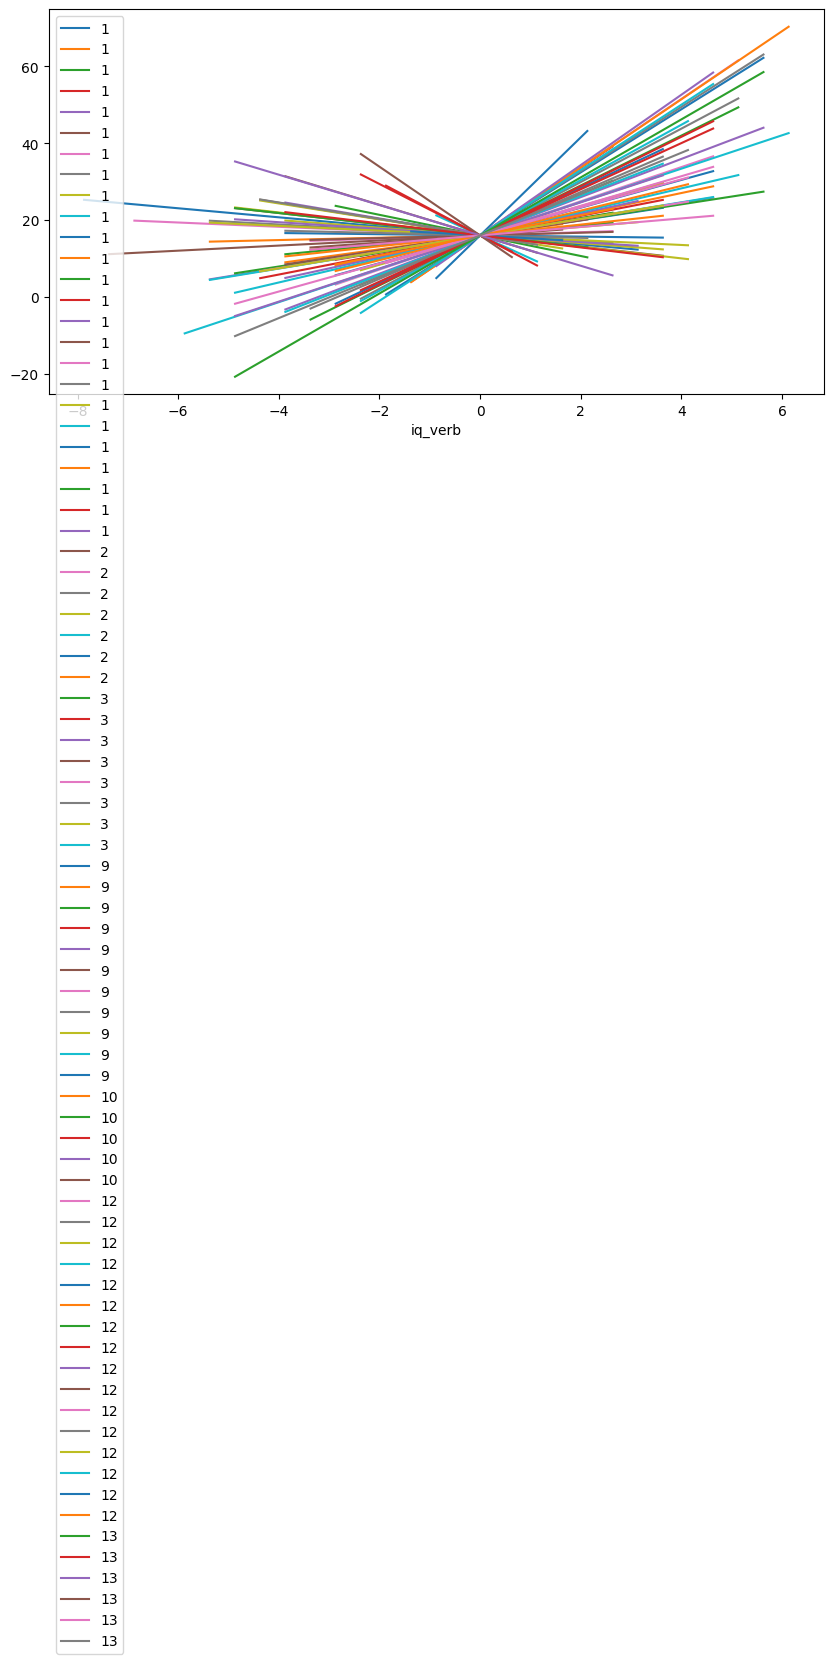

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

# Filter the data to include only 'schoolnr' less than 100
filtered_data = data2_sort[data2_sort['schoolnr'] < 100]

# Group and plot the filtered data
filtered_data.groupby('schoolnr').plot('iq_verb', 'y_hat', ax=ax)

ax.legend(filtered_data['schoolnr'])

plt.show()


# **Random Intercept and Slope Model**

In [ ]:
# Random Slope Model: Random intercepts and slopes are correlated

model3 = smf.mixedlm("langpost ~ iq_verb + gmean_IQverb", data, groups= "schoolnr",
                     re_formula = "1 + iq_verb").fit()

print(model3.summary())


               Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    langpost   
No. Observations:     3758       Method:                REML       
No. Groups:           2490       Scale:                 36.7542    
Min. group size:      1          Log-Likelihood:        -14229.6554
Max. group size:      31         Converged:             Yes        
Mean group size:      1.5                                          
-------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                1.459    0.377   3.866 0.000  0.719  2.199
iq_verb                  4.526    0.478   9.470 0.000  3.589  5.463
gmean_IQverb            -5.875    0.577 -10.183 0.000 -7.006 -4.745
schoolnr Var           155.686    1.334                            
schoolnr x iq_verb Cov  -7.913    0.325                        

# **Likelihood ratio test to compare 2 models**

In [ ]:
import statsmodels.regression.linear_model as sm
import scipy.stats as stats

# Estimate the two models


# Get the log-likelihoods of the two models (here we are comparing the model fit between model2(random slopes) and model3(randomslope/intercept)
log_likelihood_full = model2.llf
log_likelihood_restricted = model3.llf

# Calculate the likelihood ratio test statistic
lr_stat = 2 * (log_likelihood_full - log_likelihood_restricted)

# Calculate the p-value of the likelihood ratio test statistic
p_value = stats.chi2.cdf(lr_stat, df=1)

# Print the p-value
print(p_value)

0.0
